# Read Dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# a function to add names to features, store their data to pandas dataframe, and adding bias term to their features
def Prepare_dataset(feature_names, location_of_data):
  df_data = pd.read_csv(location_of_data, names=feature_names)
  Bias_coefficients = [1]*len(df_data.axes[0])
  df_data['Bias_coefficients'] = Bias_coefficients
  first_column = df_data.pop('Bias_coefficients')
  df_data.insert(0, 'Bias_coefficients', first_column)
  return df_data

In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import display
import time


#define names for features 
column_names_1 =['Hue','Proanthocyanins','Nonflavanoid phenols',
          'Flavanoids','Total phenols','Magnesium','Alkalinity of ash','Ash'
          ,'Malic acid','Alcohol','white wine classes']
column_names_2 =['Pregnancies','Glucose','BloodPressure',
          'Heart Rate','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction'
          ,'Age','Blood in Kidney classes']

In [4]:
# read and display data
df_data_1 = Prepare_dataset(column_names_1,'/content/gdrive/MyDrive/ML/White_wine Quality.csv')
df_data_2 = Prepare_dataset(column_names_2,'/content/gdrive/MyDrive/ML/Kidney disease.csv')
display(df_data_1.head())
display(df_data_2.head())

,Bias_coefficients,Hue,Proanthocyanins,Nonflavanoid phenols,Flavanoids,Total phenols,Magnesium,Alkalinity of ash,Ash,Malic acid,Alcohol,white wine classes
0,1,0.28319,0.28082,0.04,0.054795,0.106840,0.225350,0.088339,0.46442,0.46457,0.13772,1
1,1,0.19469,0.34932,0.07,0.082192,0.128550,0.140850,0.134280,0.38371,0.57480,0.13174,1
2,1,0.30088,0.20548,0.17,0.075342,0.101840,0.070423,0.042403,0.52311,0.43307,0.16766,1
3,1,0.30088,0.20548,0.17,0.075342,0.101840,0.070423,0.042403,0.52311,0.43307,0.16766,1
4,1,0.24779,0.34247,0.05,0.068493,0.093489,0.323940,0.127210,0.44241,0.53543,0.14371,1


,Bias_coefficients,Pregnancies,Glucose,BloodPressure,Heart Rate,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Blood in Kidney classes
0,1,0.29412,0.79397,0.68852,0.41414,0.248230,0.58718,0.135350,0.133330,0.46154,1
1,1,0.17647,0.53769,0.50820,0.13131,0.056738,0.34128,0.256190,0.033333,0.52308,1
2,1,0.23529,0.54774,0.52459,0.44444,0.117020,0.51863,0.353120,0.083333,0.52308,1
3,1,0.23529,0.74372,0.49180,0.27273,0.375890,0.46051,0.030743,0.133330,0.27692,1
4,1,0.47059,0.98492,0.62295,0.29293,0.330970,0.55887,0.225020,0.600000,0.63077,1


In [5]:
# store dataframes into a numpy arrays
Dataset_1 = df_data_1.to_numpy()
Dataset_2 = df_data_2.to_numpy()
n_data_d1, n_features_d1 = Dataset_1.shape
n_data_d2, n_features_d2 = Dataset_2.shape

# Data Visualization and Analysis


<ipython-input-6-9df7705e0ee1>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_data_1.hist(ax = ax)


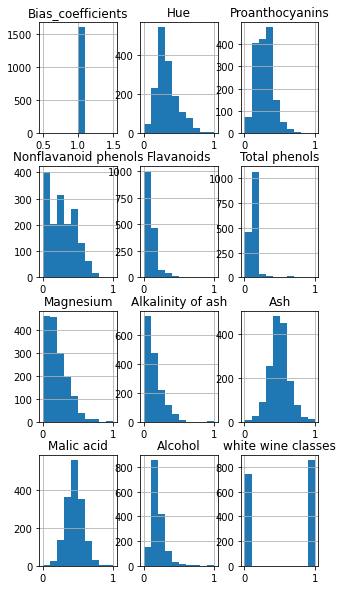

In [6]:
# plot histograms of features
fig = plt.figure(figsize = (5,10))
ax = fig.gca()
df_data_1.hist(ax = ax)
plt.show()

<ipython-input-7-0d72949df0ca>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_data_2.hist(ax = ax)


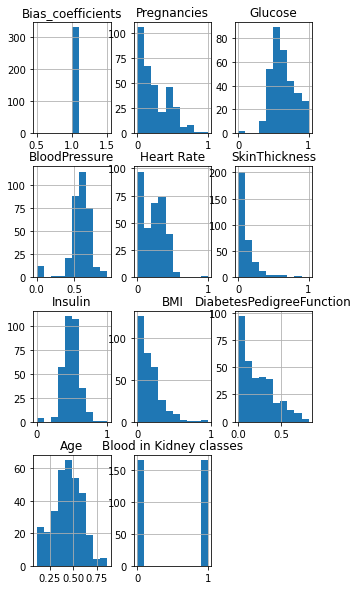

In [7]:
fig = plt.figure(figsize = (5,10))
ax = fig.gca()
df_data_2.hist(ax = ax)
plt.show()

In [8]:
# function to plot histogram of each feature and to fit a normal distribution to each of them.
def Data_visulaization(feature, feature_name):
  std = np.std(feature, ddof = 1)
  mean = np.mean(feature)
  print(f"the std of {feature_name} is:{std}")
  print(f"the mean of {feature_name} is:{mean}")
  domain = np.linspace(np.min(feature), np.max(feature))
  plt.title(f"The distribution of {feature_name}")
  plt.plot(domain,norm.pdf(domain,mean,std))
  plt.hist(feature, color='g', density = True)
  plt.show()


the std of Hue is:0.15407935769814407
the mean of Hue is:0.3291715125703565


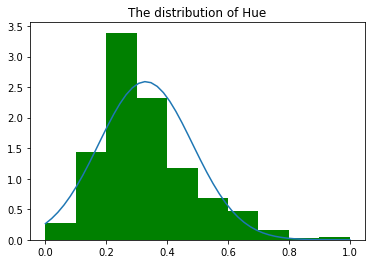

the std of Proanthocyanins is:0.12264369384776212
the mean of Proanthocyanins is:0.2793290393996248


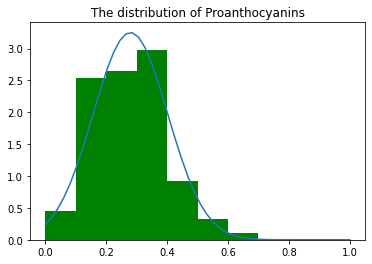

the std of Nonflavanoid phenols is:0.19480113740531857
the mean of Nonflavanoid phenols is:0.2709756097560976


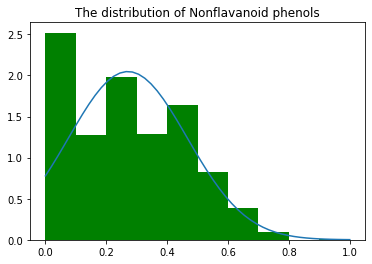

the std of Flavanoids is:0.0965704516184305
the mean of Flavanoids is:0.11224726391494685


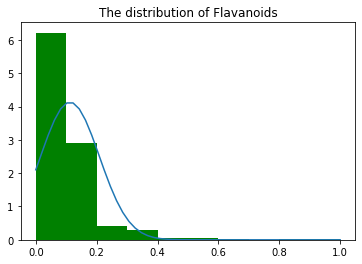

the std of Total phenols is:0.0785731023040029
the mean of Total phenols is:0.1259873151969981


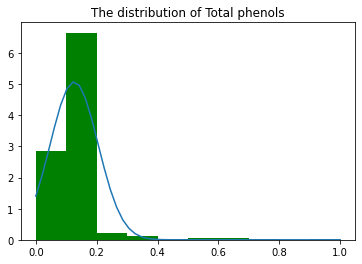

the std of Magnesium is:0.14732602026437056
the mean of Magnesium is:0.20950620700437775


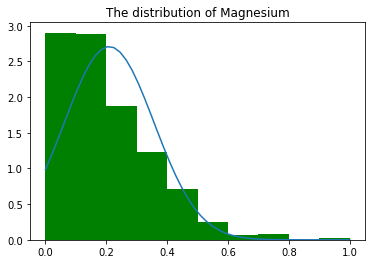

the std of Alkalinity of ash is:0.11623783116923093
the mean of Alkalinity of ash is:0.14299555459662291


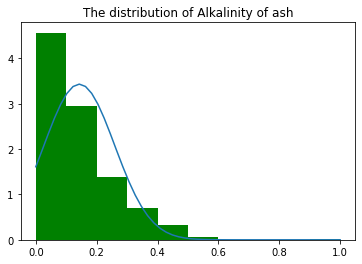

the std of Ash is:0.13846098798927226
the mean of Ash is:0.48985298549093176


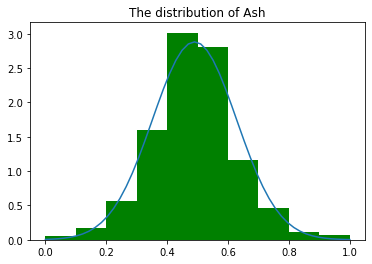

the std of Malic acid is:0.12156464116456436
the mean of Malic acid is:0.4496950831769856


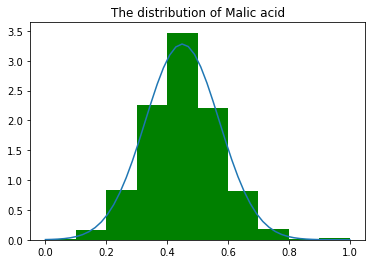

the std of Alcohol is:0.10150141136695744
the mean of Alcohol is:0.1964960062539087


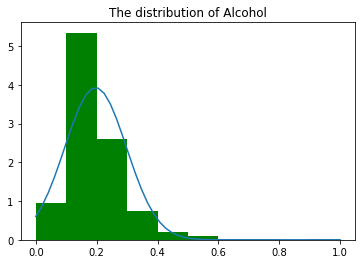

the std of white wine classes is:0.4989498607713422
the mean of white wine classes is:0.5347091932457786


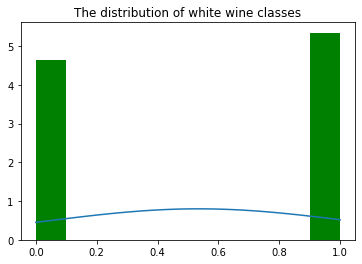

In [9]:
# first dataset visualization
for i in range(n_features_d1-1):
  Data_visulaization(Dataset_1[:,i+1], df_data_1.columns[i+1])


the std of Pregnancies is:0.20712101240369873
the mean of Pregnancies is:0.2409982


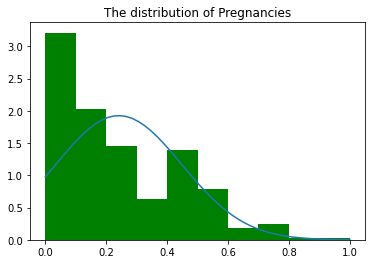

the std of Glucose is:0.1656609645738955
the mean of Glucose is:0.6361961818181818


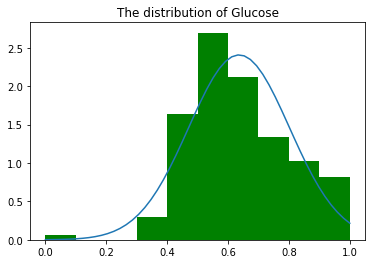

the std of BloodPressure is:0.14839363893123814
the mean of BloodPressure is:0.5794580606060606


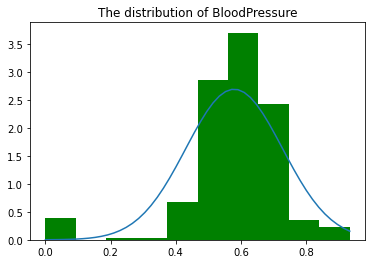

the std of Heart Rate is:0.167229202183597
the mean of Heart Rate is:0.21490665454545455


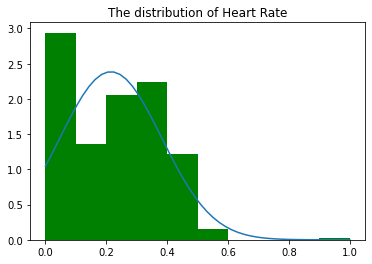

the std of SkinThickness is:0.15601126824210504
the mean of SkinThickness is:0.10703135757575756


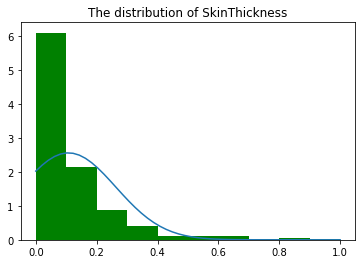

the std of Insulin is:0.11853989996677801
the mean of Insulin is:0.489428


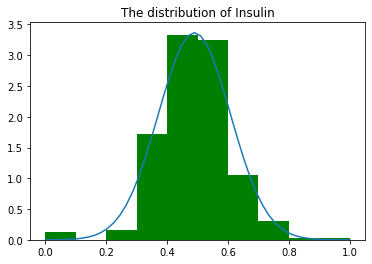

the std of BMI is:0.147909796809137
the mean of BMI is:0.17768298818181819


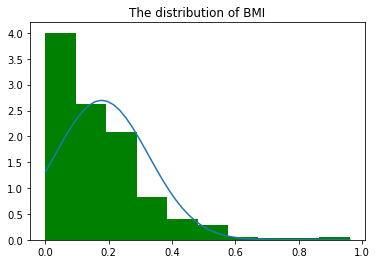

the std of DiabetesPedigreeFunction is:0.19224619984700977
the mean of DiabetesPedigreeFunction is:0.22348502424242422


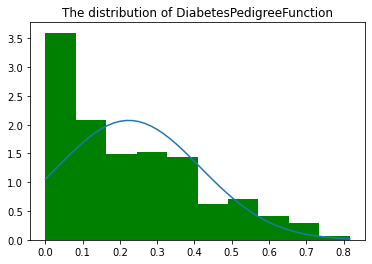

the std of Age is:0.15366373179500842
the mean of Age is:0.4402796363636364


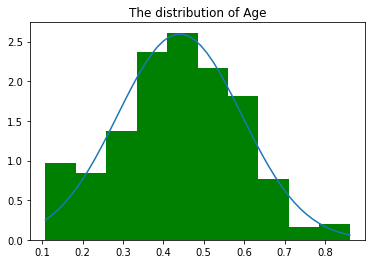

the std of Blood in Kidney classes is:0.5007593018801078
the mean of Blood in Kidney classes is:0.5


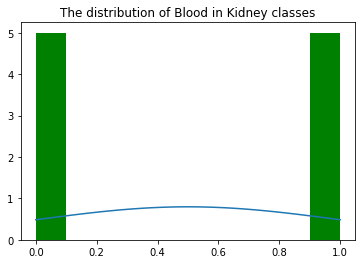

In [10]:
# Second dataset visualization
for i in range(n_features_d2-1):
  Data_visulaization(Dataset_2[:,i+1], df_data_2.columns[i+1])

# Logistic regression class

In [11]:
class Log_Reg:



  def __init__(self, learning_rate=0.002, number_of_iterations=5000):
    self.number_of_iterations = number_of_iterations
    self.learning_rate=learning_rate
    self.weights=None
    self.loss=None

  def sigmoid_function(self, z):
    return 1 / (1 + np.exp(-z))

  def fit_model(self, X, Y):

    start = time.time()

    self.weights=np.zeros(X[0].shape)
    self.loss=np.zeros(self.number_of_iterations)
    self.accurcay=np.zeros(self.number_of_iterations)
    self.number_of_steps=0

    for i in range(self.number_of_iterations):
      log_odds_ratio=np.dot(X, self.weights)
      y_prediction=self.sigmoid_function(log_odds_ratio)
      

      Previous_weights = self.weights
      Gradient_wrt_W=-np.dot(X.T, (Y-y_prediction)) 
      
      self.weights=self.weights-self.learning_rate*Gradient_wrt_W
      self.loss[i] = (-np.sum((Y*np.log(y_prediction) + (1-Y)*np.log(1-y_prediction))))/len(Y)

      Prediction = self.predict_test(X)
      self.accurcay[i] = self.Accu_eval(Prediction,Y)

      if np.linalg.norm(Gradient_wrt_W) <0.1 or (np.linalg.norm(self.weights-Previous_weights))**2 < 10**(-6):
        break

    self.number_of_steps = i
    end = time.time()
    run_time = end - start
    return run_time
    

  def plot_loss_accuracy(self):
    plt.subplot(1, 2, 1)
    plt.title("Loss values")
    plt.plot(np.arange(1, self.number_of_steps+1, 1), self.loss[0:self.number_of_steps], color="red")
    plt.subplot(1, 2, 2)
    plt.title("accurcay")
    plt.plot(np.arange(1, self.number_of_steps+1, 1), self.accurcay[0:self.number_of_steps], color="red")
    plt.show()

  def predict_test(self, X):
    log_odds_ratio=np.dot(X, self.weights)
    y_predict=self.sigmoid_function(log_odds_ratio)
    prediction=[0 if y<=0.5 else 1 for y in y_predict]
    return prediction

  def Accu_eval(self, prediction, true_labels):
    accuracy_score = 100*((len(true_labels)-np.count_nonzero(prediction-true_labels))/len(true_labels))
    return accuracy_score
   

# Feature selection and augmentation

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# a function based on Chi-square approach to find unappropriate features for classification,
#and will extract the top three important features
def Chi_Square(dataframe):

  X = dataframe.iloc[:,1:len(dataframe.axes[1])-1]  #independent columns
  y = dataframe.iloc[:,-1]    #target column i.e price range

  #apply SelectKBest class to extract top 10 best features
  bestfeatures = SelectKBest(score_func=chi2, k=len(dataframe.axes[1])-2)
  fit = bestfeatures.fit(X,y)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)

  #concat two dataframes for better visualization 
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)

  featureScores.columns = ['Specs','Score']  #naming the dataframe columns
  print(featureScores.nlargest(10,'Score'))
  
  # Get the top three maximum values of column 'C'
  top_three_max = featureScores['Score'].nlargest(3).tolist()

  # Get the rows where the value of column 'C' is in the top three maximum values
  top_three_rows = featureScores[featureScores['Score'].isin(top_three_max)]

  # Extract the values of the second column 'B'
  Top_three_features = top_three_rows['Specs'].values

  # Get the rows where the value of column 'C' is lower than the threshold
  rows = featureScores[featureScores['Score'] < 0.5]

  # Extract the values of the second column 'B'
  Non_importatnt_features = rows['Specs'].values

  return Top_three_features, Non_importatnt_features

In [13]:
top_three_features_dataframe_1, Non_importatnt_features_1 = Chi_Square(df_data_1)
top_three_features_dataframe_2, Non_importatnt_features_2 = Chi_Square(df_data_2)

                  Specs     Score
1       Proanthocyanins  8.891090
6     Alkalinity of ash  8.124311
2  Nonflavanoid phenols  5.666703
9               Alcohol  3.984511
7                   Ash  1.582373
0                   Hue  1.042163
4         Total phenols  0.938781
5             Magnesium  0.631414
3            Flavanoids  0.000620
8            Malic acid  0.000560
                      Specs     Score
7  DiabetesPedigreeFunction  5.541858
0               Pregnancies  5.148587
1                   Glucose  3.037114
4             SkinThickness  0.933204
5                   Insulin  0.893788
6                       BMI  0.662618
3                Heart Rate  0.324607
2             BloodPressure  0.135492
8                       Age  0.032849


In [14]:
# a function to add quadratic feaetures to dataframe
def Add_additional_feature(data_frame, feature, power, feature_name):
  df = data_frame.copy()
  Newfeature_1 = (df[feature]**power).values.tolist()
  df.insert(loc = len(df.axes[1])-1,column = feature_name, value= Newfeature_1)
  return df

# Feature selection based on correlation matrix

In [15]:
# a function to plot heatmap and gives the most correlated features
import seaborn as sns
def Correlated_featurs(data_frame, threshold):
  cor = data_frame.corr()
  #Using Pearson Correlation
  plt.figure(figsize=(10,8))  
  sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
  plt.show()


  # Calculate the correlation matrix
  corr_matrix = data_frame.corr().abs()

  # Get the upper triangle of the correlation matrix
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

  # Find the features with the highest correlation
  most_correlated = [column for column in upper.columns if any(upper[column] > threshold)]

  return most_correlated


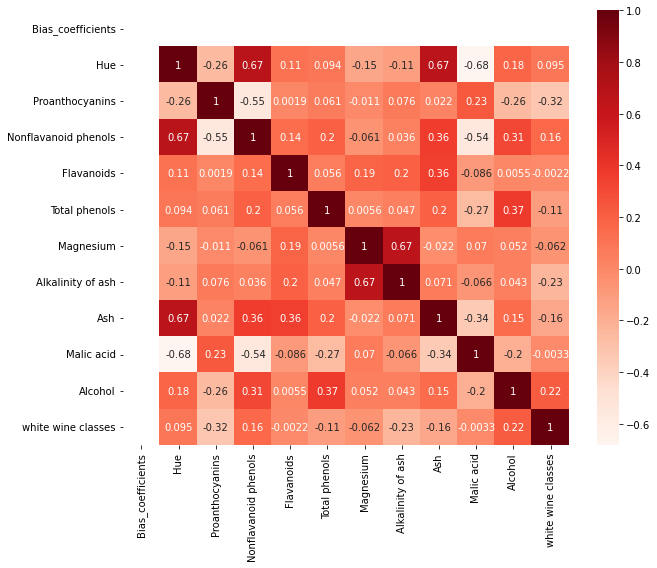

<ipython-input-15-05533dcae40b>:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['Nonflavanoid phenols', 'Alkalinity of ash', 'Ash', 'Malic acid']


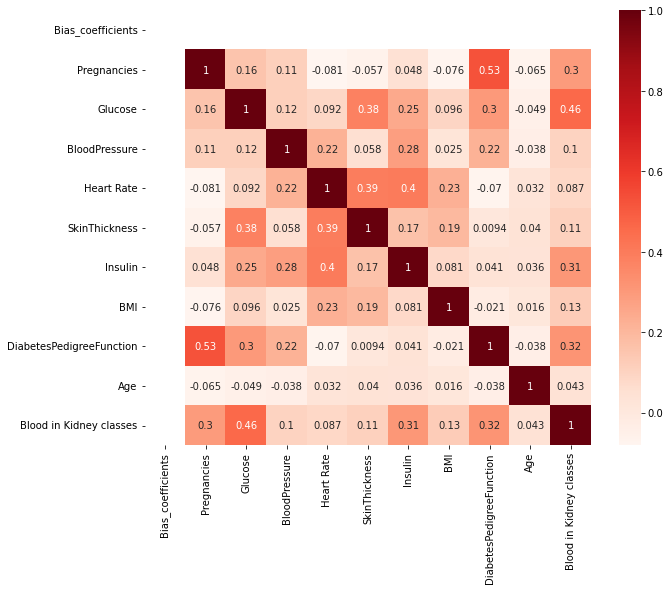

['DiabetesPedigreeFunction']


In [16]:
correlated_features_df1 = Correlated_featurs(df_data_1, 0.66)
print(correlated_features_df1)
correlated_features_df2 = Correlated_featurs(df_data_2,0.5)
print(correlated_features_df2)

In [17]:
# adding or removing new features to create various models to evaluate accuracy
# We created and tested various models by 1. dropping some non-importatn features, adding quadratic forms of  most correlated features and removing correlated features
df_data_model_11 = df_data_1.copy().drop(columns=Non_importatnt_features_1)
df_data_model_21 = df_data_2.copy().drop(columns=Non_importatnt_features_2)

df_data_model_12 = df_data_1.copy().drop(columns=correlated_features_df1)
df_data_model_22 = df_data_2.copy().drop(columns=correlated_features_df2)

df_data_model_13 = Add_additional_feature(df_data_1, top_three_features_dataframe_1[0],
                                          2, "new_feature_1")

df_data_model_13 = Add_additional_feature(df_data_model_13, top_three_features_dataframe_1[2],
                                          4, "new_feature_3")


df_data_model_23 = Add_additional_feature(df_data_2, top_three_features_dataframe_2[0],
                                          2, "new_feature_1")

df_data_model_23 = Add_additional_feature(df_data_model_23, top_three_features_dataframe_2[1],
                                          2, "new_feature_2")

df_data_model_23 = Add_additional_feature(df_data_model_23, top_three_features_dataframe_2[2],
                                          2, "new_feature_3")

df_data_model_14 = df_data_1.copy().drop(columns=Non_importatnt_features_1)
df_data_model_14 = Add_additional_feature(df_data_model_14, top_three_features_dataframe_1[0],
                                          2, "new_feature_1")
df_data_model_14 = Add_additional_feature(df_data_model_14, top_three_features_dataframe_1[2],
                                          2, "new_feature_3")

df_data_model_24 = df_data_2.copy().drop(columns=Non_importatnt_features_2)
df_data_model_24 = Add_additional_feature(df_data_model_24, top_three_features_dataframe_2[0],
                                          2, "new_feature_1")
df_data_model_24 = Add_additional_feature(df_data_model_24, top_three_features_dataframe_2[2],
                                          2, "new_feature_3")


In [18]:
display(df_data_model_11.head())
display(df_data_model_12.head())
display(df_data_model_13.head())
display(df_data_model_21.head())
display(df_data_model_22.head())
display(df_data_model_23.head())

,Bias_coefficients,Hue,Proanthocyanins,Nonflavanoid phenols,Total phenols,Magnesium,Alkalinity of ash,Ash,Alcohol,white wine classes
0,1,0.28319,0.28082,0.04,0.106840,0.225350,0.088339,0.46442,0.13772,1
1,1,0.19469,0.34932,0.07,0.128550,0.140850,0.134280,0.38371,0.13174,1
2,1,0.30088,0.20548,0.17,0.101840,0.070423,0.042403,0.52311,0.16766,1
3,1,0.30088,0.20548,0.17,0.101840,0.070423,0.042403,0.52311,0.16766,1
4,1,0.24779,0.34247,0.05,0.093489,0.323940,0.127210,0.44241,0.14371,1


,Bias_coefficients,Hue,Proanthocyanins,Flavanoids,Total phenols,Magnesium,Alcohol,white wine classes
0,1,0.28319,0.28082,0.054795,0.106840,0.225350,0.13772,1
1,1,0.19469,0.34932,0.082192,0.128550,0.140850,0.13174,1
2,1,0.30088,0.20548,0.075342,0.101840,0.070423,0.16766,1
3,1,0.30088,0.20548,0.075342,0.101840,0.070423,0.16766,1
4,1,0.24779,0.34247,0.068493,0.093489,0.323940,0.14371,1


,Bias_coefficients,Hue,Proanthocyanins,Nonflavanoid phenols,Flavanoids,Total phenols,Magnesium,Alkalinity of ash,Ash,Malic acid,Alcohol,new_feature_1,new_feature_3,white wine classes
0,1,0.28319,0.28082,0.04,0.054795,0.106840,0.225350,0.088339,0.46442,0.46457,0.13772,0.078860,0.000061,1
1,1,0.19469,0.34932,0.07,0.082192,0.128550,0.140850,0.134280,0.38371,0.57480,0.13174,0.122024,0.000325,1
2,1,0.30088,0.20548,0.17,0.075342,0.101840,0.070423,0.042403,0.52311,0.43307,0.16766,0.042222,0.000003,1
3,1,0.30088,0.20548,0.17,0.075342,0.101840,0.070423,0.042403,0.52311,0.43307,0.16766,0.042222,0.000003,1
4,1,0.24779,0.34247,0.05,0.068493,0.093489,0.323940,0.127210,0.44241,0.53543,0.14371,0.117286,0.000262,1


,Bias_coefficients,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Blood in Kidney classes
0,1,0.29412,0.79397,0.248230,0.58718,0.135350,0.133330,1
1,1,0.17647,0.53769,0.056738,0.34128,0.256190,0.033333,1
2,1,0.23529,0.54774,0.117020,0.51863,0.353120,0.083333,1
3,1,0.23529,0.74372,0.375890,0.46051,0.030743,0.133330,1
4,1,0.47059,0.98492,0.330970,0.55887,0.225020,0.600000,1


,Bias_coefficients,Pregnancies,Glucose,BloodPressure,Heart Rate,SkinThickness,Insulin,BMI,Age,Blood in Kidney classes
0,1,0.29412,0.79397,0.68852,0.41414,0.248230,0.58718,0.135350,0.46154,1
1,1,0.17647,0.53769,0.50820,0.13131,0.056738,0.34128,0.256190,0.52308,1
2,1,0.23529,0.54774,0.52459,0.44444,0.117020,0.51863,0.353120,0.52308,1
3,1,0.23529,0.74372,0.49180,0.27273,0.375890,0.46051,0.030743,0.27692,1
4,1,0.47059,0.98492,0.62295,0.29293,0.330970,0.55887,0.225020,0.63077,1


,Bias_coefficients,Pregnancies,Glucose,BloodPressure,Heart Rate,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,new_feature_1,new_feature_2,new_feature_3,Blood in Kidney classes
0,1,0.29412,0.79397,0.68852,0.41414,0.248230,0.58718,0.135350,0.133330,0.46154,0.086507,0.630388,0.017777,1
1,1,0.17647,0.53769,0.50820,0.13131,0.056738,0.34128,0.256190,0.033333,0.52308,0.031142,0.289111,0.001111,1
2,1,0.23529,0.54774,0.52459,0.44444,0.117020,0.51863,0.353120,0.083333,0.52308,0.055361,0.300019,0.006944,1
3,1,0.23529,0.74372,0.49180,0.27273,0.375890,0.46051,0.030743,0.133330,0.27692,0.055361,0.553119,0.017777,1
4,1,0.47059,0.98492,0.62295,0.29293,0.330970,0.55887,0.225020,0.600000,0.63077,0.221455,0.970067,0.360000,1


# data split

In [19]:
class data_split:

  def __init__(self, ratio=0.80, dataframe=df_data_1):
    self.dataframe = dataframe
    self.ratio=ratio
    self.n_samples=len(self.dataframe)
    self.indices = np.random.permutation(self.n_samples)

  def train_test_split(self,dataframe):
    split_index = int(self.ratio * self.n_samples)
    train_idx, test_idx = self.indices[:split_index], self.indices[split_index:]
    train, test = dataframe.iloc[train_idx], dataframe.iloc[test_idx]
    return train.to_numpy(), test.to_numpy()

In [20]:
# we have splitted test and train with the ratio of 80 to 20 for both datasets
split_class_1 = data_split(ratio=0.80, dataframe=df_data_1)
train_df1_model1, test_df1_model1 = split_class_1.train_test_split(df_data_1)
train_df1_model2, test_df1_model2 = split_class_1.train_test_split(df_data_model_11)
train_df1_model3, test_df1_model3 = split_class_1.train_test_split(df_data_model_12)
train_df1_model4, test_df1_model4 = split_class_1.train_test_split(df_data_model_13)
train_df1_model5, test_df1_model5 = split_class_1.train_test_split(df_data_model_14)

split_class_2 = data_split(ratio=0.80, dataframe=df_data_2)
train_df2_model1, test_df2_model1 = split_class_2.train_test_split(df_data_2)
train_df2_model2, test_df2_model2 = split_class_2.train_test_split(df_data_model_21)
train_df2_model3, test_df2_model3 = split_class_2.train_test_split(df_data_model_22)
train_df2_model4, test_df2_model4 = split_class_2.train_test_split(df_data_model_23)
train_df2_model5, test_df2_model5 = split_class_2.train_test_split(df_data_model_24)


# Confusion Matrix

In [21]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Test Simple models


run time is equal to: 7.249779939651489 seconds


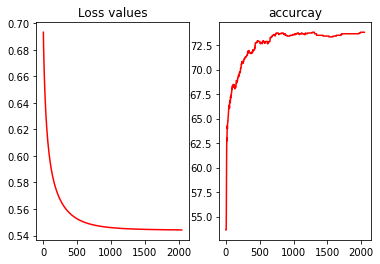

Train accuracy is: 73.80766223612197 %
Test accuracy is: 72.8125 %
Confusion matrix, without normalization


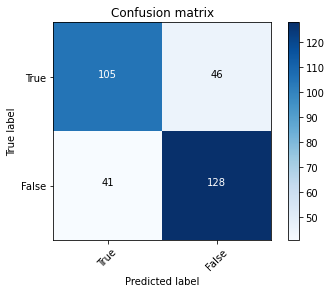

In [22]:
# test white wine dataset using normal features and plot the accuracy, loss values, and confusion matrix
cls_1 = Log_Reg(learning_rate=0.002)
run_time = cls_1.fit_model(train_df1_model1[:,0:train_df1_model1.shape[1]-1], train_df1_model1[:,train_df1_model1.shape[1]-1])
print("run time is equal to:",run_time,"seconds")
cls_1.plot_loss_accuracy()

prediction = cls_1.predict_test(train_df1_model1[:,0:train_df1_model1.shape[1]-1])
accuracy = cls_1.Accu_eval(prediction,train_df1_model1[:,train_df1_model1.shape[1]-1])
print("Train accuracy is:",accuracy,"%")


prediction = cls_1.predict_test(test_df1_model1[:,0:train_df1_model1.shape[1]-1])
accuracy = cls_1.Accu_eval(prediction,test_df1_model1[:,train_df1_model1.shape[1]-1])
print("Test accuracy is:",accuracy,"%")

cm = metrics.confusion_matrix(test_df1_model1[:,train_df1_model1.shape[1]-1], prediction)
plot_confusion_matrix(cm, ['True', 'False'])


run time is equal to: 0.3874382972717285 seconds


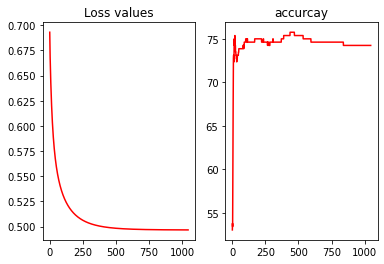

Train accuracy is: 74.24242424242425 %
Test accuracy is: 77.27272727272727 %
Confusion matrix, without normalization


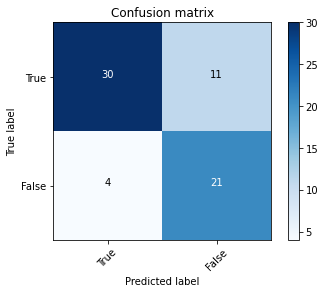

In [23]:
# test Blood in kideny dataset using normal features and plot the accuracy, loss values, and confusion matrix
cls_2 = Log_Reg(learning_rate=0.01)
run_time = cls_2.fit_model(train_df2_model1[:,0:train_df2_model1.shape[1]-1], train_df2_model1[:,train_df2_model1.shape[1]-1])
print("run time is equal to:",run_time,"seconds")
cls_2.plot_loss_accuracy()

prediction = cls_2.predict_test(train_df2_model1[:,0:train_df2_model1.shape[1]-1])
accuracy = cls_2.Accu_eval(prediction,train_df2_model1[:,train_df2_model1.shape[1]-1])
print("Train accuracy is:",accuracy,"%")


prediction = cls_2.predict_test(test_df2_model1[:,0:train_df2_model1.shape[1]-1])
accuracy = cls_2.Accu_eval(prediction,test_df2_model1[:,train_df2_model1.shape[1]-1])
print("Test accuracy is:",accuracy,"%")

cm = metrics.confusion_matrix(test_df2_model1[:,train_df2_model1.shape[1]-1], prediction)
plot_confusion_matrix(cm, ['True', 'False'])

# Test models with different learning rates


<ipython-input-11-ef756487ea06>:32: RuntimeWarning: divide by zero encountered in log
  self.loss[i] = (-np.sum((Y*np.log(y_prediction) + (1-Y)*np.log(1-y_prediction))))/len(Y)


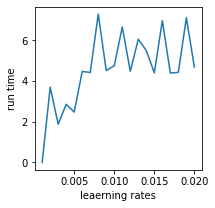

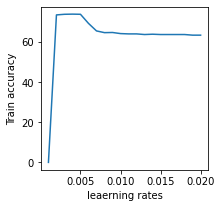

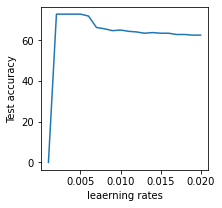

In [24]:
# evaluation of accuracy and convergence speed for white wine class by different learning rates

Train_accuracy = np.zeros(20)
Test_accuracy = np.zeros(20)
run_time = np.zeros(20)
for i in range(1,20,1):
  cls_5 = Log_Reg(learning_rate=i/1000)
  run_time[i] = cls_5.fit_model(train_df1_model1[:,0:train_df1_model1.shape[1]-1], train_df1_model1[:,train_df1_model1.shape[1]-1])
  prediction = cls_5.predict_test(train_df1_model1[:,0:train_df1_model1.shape[1]-1])
  Train_accuracy[i] = cls_5.Accu_eval(prediction,train_df1_model1[:,train_df1_model1.shape[1]-1])
  prediction = cls_5.predict_test(test_df1_model1[:,0:train_df1_model1.shape[1]-1])
  Test_accuracy[i] = cls_5.Accu_eval(prediction,test_df1_model1[:,train_df1_model1.shape[1]-1])

plt.figure(figsize=(3, 3))
plt.plot(np.arange(0.001, 0.021, 0.001), run_time)
plt.xlabel('leaerning rates')
plt.ylabel('run time')
plt.show()
plt.figure(figsize=(3, 3))
plt.plot(np.arange(0.001, 0.021, 0.001), Train_accuracy)
plt.xlabel('leaerning rates')
plt.ylabel('Train accuracy')
plt.show()
plt.figure(figsize=(3, 3))
plt.plot(np.arange(0.001, 0.021, 0.001), Test_accuracy)
plt.xlabel('leaerning rates')
plt.ylabel('Test accuracy')
plt.show()




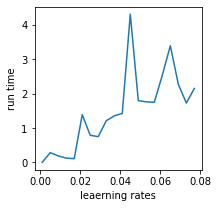

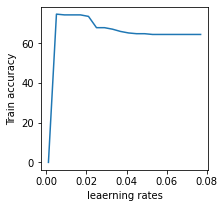

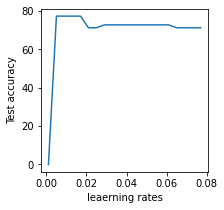

In [25]:
# evaluation of accuracy and convergence speed for Blood in kidney dataset by different learning rates
Train_accuracy = np.zeros(20)
Test_accuracy = np.zeros(20)
run_time = np.zeros(20)
for i in range(1,20,1):
  cls_6 = Log_Reg(learning_rate=i/250)
  run_time[i] = cls_6.fit_model(train_df2_model1[:,0:train_df2_model1.shape[1]-1], train_df2_model1[:,train_df2_model1.shape[1]-1])
  prediction = cls_6.predict_test(train_df2_model1[:,0:train_df2_model1.shape[1]-1])
  Train_accuracy[i] = cls_6.Accu_eval(prediction,train_df2_model1[:,train_df2_model1.shape[1]-1])
  prediction = cls_6.predict_test(test_df2_model1[:,0:train_df2_model1.shape[1]-1])
  Test_accuracy[i] = cls_6.Accu_eval(prediction,test_df2_model1[:,train_df2_model1.shape[1]-1])



plt.figure(figsize=(3, 3))
plt.plot(np.arange(0.001, 0.081, 0.004), run_time)
plt.xlabel('leaerning rates')
plt.ylabel('run time')
plt.show()
plt.figure(figsize=(3, 3))
plt.plot(np.arange(0.001, 0.081, 0.004), Train_accuracy)
plt.xlabel('leaerning rates')
plt.ylabel('Train accuracy')
plt.show()
plt.figure(figsize=(3, 3))
plt.plot(np.arange(0.001, 0.081, 0.004), Test_accuracy)
plt.xlabel('leaerning rates')
plt.ylabel('Test accuracy')
plt.show()



# Test models with selected features Using Chi-square



run time is equal to: 1.964369773864746 seconds


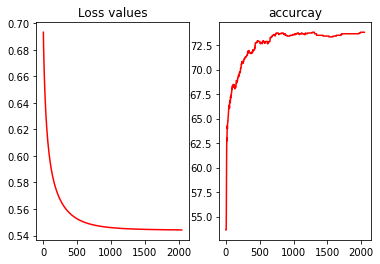

Train accuracy is: 73.80766223612197 %
Test accuracy is: 72.8125 %
Confusion matrix, without normalization


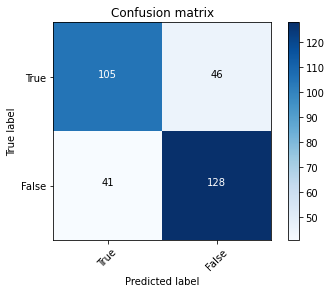

In [26]:
# test white wine quality evaluation dataset using feature selection absed on Chi-Square approach and plot the accuracy, loss values, and confusion matrix
cls_3 = Log_Reg(learning_rate=0.002)
run_time = cls_3.fit_model(train_df1_model1[:,0:train_df1_model1.shape[1]-1], train_df1_model1[:,train_df1_model1.shape[1]-1])
print("run time is equal to:",run_time,"seconds")
cls_3.plot_loss_accuracy()

prediction = cls_3.predict_test(train_df1_model1[:,0:train_df1_model1.shape[1]-1])
accuracy = cls_3.Accu_eval(prediction,train_df1_model1[:,train_df1_model1.shape[1]-1])
print("Train accuracy is:",accuracy,"%")


prediction = cls_3.predict_test(test_df1_model1[:,0:train_df1_model1.shape[1]-1])
accuracy = cls_3.Accu_eval(prediction,test_df1_model1[:,train_df1_model1.shape[1]-1])
print("Test accuracy is:",accuracy,"%")

cm = metrics.confusion_matrix(test_df1_model1[:,train_df1_model1.shape[1]-1], prediction)
plot_confusion_matrix(cm, ['True', 'False'])


run time is equal to: 0.1414661407470703 seconds


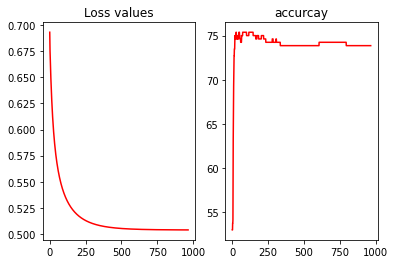

Train accuracy is: 73.86363636363636 %
Test accuracy is: 75.75757575757575 %
Confusion matrix, without normalization


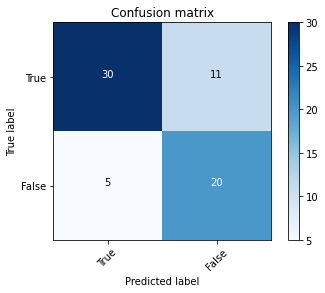

In [27]:
# test Blood in kideny dataset using feature selection absed on Chi-Square approach and plot the accuracy, loss values, and confusion matrix
cls_4 = Log_Reg(learning_rate=0.009)
run_time = cls_4.fit_model(train_df2_model2[:,0:train_df2_model2.shape[1]-1], train_df2_model2[:,train_df2_model2.shape[1]-1])
print("run time is equal to:",run_time,"seconds")
cls_4.plot_loss_accuracy()

prediction = cls_4.predict_test(train_df2_model2[:,0:train_df2_model2.shape[1]-1])
accuracy = cls_4.Accu_eval(prediction,train_df2_model2[:,train_df2_model2.shape[1]-1])
print("Train accuracy is:",accuracy,"%")


prediction = cls_4.predict_test(test_df2_model2[:,0:train_df2_model2.shape[1]-1])
accuracy = cls_4.Accu_eval(prediction,test_df2_model2[:,train_df2_model2.shape[1]-1])
print("Test accuracy is:",accuracy,"%")

cm = metrics.confusion_matrix(test_df2_model2[:,train_df2_model2.shape[1]-1], prediction)
plot_confusion_matrix(cm, ['True', 'False'])

# Test models with selected features Using correlation approach



run time is equal to: 1.2025165557861328 seconds


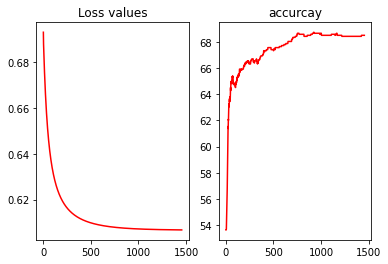

Train accuracy is: 68.49100860046912 %
Test accuracy is: 67.5 %
Confusion matrix, without normalization


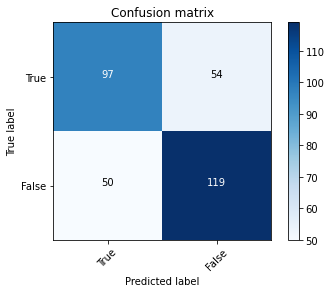

In [28]:
cls_3 = Log_Reg(learning_rate=0.002)
run_time = cls_3.fit_model(train_df1_model3[:,0:train_df1_model3.shape[1]-1], train_df1_model3[:,train_df1_model3.shape[1]-1])
print("run time is equal to:",run_time,"seconds")
cls_3.plot_loss_accuracy()

prediction = cls_3.predict_test(train_df1_model3[:,0:train_df1_model3.shape[1]-1])
accuracy = cls_3.Accu_eval(prediction,train_df1_model3[:,train_df1_model3.shape[1]-1])
print("Train accuracy is:",accuracy,"%")


prediction = cls_3.predict_test(test_df1_model3[:,0:train_df1_model3.shape[1]-1])
accuracy = cls_3.Accu_eval(prediction,test_df1_model3[:,train_df1_model3.shape[1]-1])
print("Test accuracy is:",accuracy,"%")

cm = metrics.confusion_matrix(test_df1_model3[:,train_df1_model3.shape[1]-1], prediction)
plot_confusion_matrix(cm, ['True', 'False'])


run time is equal to: 0.3234121799468994 seconds


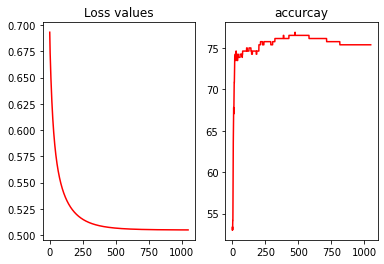

Train accuracy is: 75.37878787878788 %
Test accuracy is: 77.27272727272727 %
Confusion matrix, without normalization


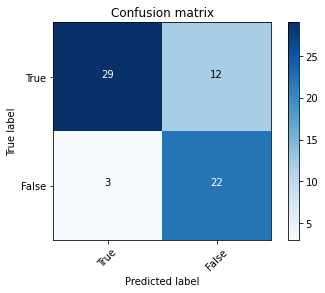

In [29]:
cls_4 = Log_Reg(learning_rate=0.01)
run_time = cls_4.fit_model(train_df2_model3[:,0:train_df2_model3.shape[1]-1], train_df2_model3[:,train_df2_model3.shape[1]-1])
print("run time is equal to:",run_time,"seconds")
cls_4.plot_loss_accuracy()

prediction = cls_4.predict_test(train_df2_model3[:,0:train_df2_model3.shape[1]-1])
accuracy = cls_4.Accu_eval(prediction,train_df2_model3[:,train_df2_model3.shape[1]-1])
print("Train accuracy is:",accuracy,"%")


prediction = cls_4.predict_test(test_df2_model3[:,0:train_df2_model3.shape[1]-1])
accuracy = cls_4.Accu_eval(prediction,test_df2_model3[:,train_df2_model3.shape[1]-1])
print("Test accuracy is:",accuracy,"%")

cm = metrics.confusion_matrix(test_df2_model3[:,train_df2_model3.shape[1]-1], prediction)
plot_confusion_matrix(cm, ['True', 'False'])

# k-Fold 


In [30]:
class kfold_cross_validation:
    def __init__(self, k=10, random_state=None):
        self.k = k
        self.random_state = random_state
    
    def split(self, X, y=None):
        """
        Generates indices to split data into training and test set for K-Fold cross validation.
        :param X: numpy array, feature matrix
        :param y: numpy array, target values
        :return: yield indices for training and test set in each iteration
        """
        if y is not None:
            X = np.column_stack((X, y))
        if self.random_state:
            np.random.seed(self.random_state)
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        n_folds = self.k
        fold_size = X.shape[0] // n_folds
        for i in range(n_folds):
            test_indices = indices[i * fold_size: (i + 1) * fold_size]
            train_indices = np.setdiff1d(indices, test_indices)
            yield train_indices, test_indices

In [31]:
def K_fold_implementation(X,y, Model_name, learning_rate):
  scores = []
  for train_indices, test_indices in kfold.split(X, y):
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    model = Log_Reg(learning_rate)
    model.fit_model(X_train, y_train)
    y_pred = model.predict_test(X_test)
    score = model.Accu_eval(y_test, y_pred)
    scores.append(score)
  print("Accuracy of", Model_name,": %.2f%% (+/- %.2f%%)" % (np.mean(scores) , np.std(scores) ))

In [32]:
# 10-fold cross validation
# here we tested five models we created for each dataset based on the feature augmentation, or feature selection approaches
kfold = kfold_cross_validation(k=10, random_state=42)
K_fold_implementation(train_df1_model1[:,0:train_df1_model1.shape[1]-1], train_df1_model1[:,train_df1_model1.shape[1]-1],"dataframe1_model1",0.002)
K_fold_implementation(train_df1_model2[:,0:train_df1_model2.shape[1]-1], train_df1_model2[:,train_df1_model2.shape[1]-1],"dataframe1_model2",0.002)
K_fold_implementation(train_df1_model3[:,0:train_df1_model3.shape[1]-1], train_df1_model3[:,train_df1_model3.shape[1]-1],"dataframe1_model3",0.002)
K_fold_implementation(train_df1_model4[:,0:train_df1_model4.shape[1]-1], train_df1_model4[:,train_df1_model4.shape[1]-1],"dataframe1_model4",0.002)
K_fold_implementation(train_df1_model5[:,0:train_df1_model5.shape[1]-1], train_df1_model5[:,train_df1_model5.shape[1]-1],"dataframe1_model5",0.002)
K_fold_implementation(train_df2_model1[:,0:train_df2_model1.shape[1]-1], train_df2_model1[:,train_df2_model1.shape[1]-1],"dataframe2_model1",0.01)
K_fold_implementation(train_df2_model2[:,0:train_df2_model2.shape[1]-1], train_df2_model2[:,train_df2_model2.shape[1]-1],"dataframe2_model2",0.01)
K_fold_implementation(train_df2_model3[:,0:train_df2_model3.shape[1]-1], train_df2_model3[:,train_df2_model3.shape[1]-1],"dataframe2_model3",0.01)
K_fold_implementation(train_df2_model4[:,0:train_df2_model4.shape[1]-1], train_df2_model4[:,train_df2_model4.shape[1]-1],"dataframe2_model3",0.01)
K_fold_implementation(train_df2_model5[:,0:train_df2_model5.shape[1]-1], train_df2_model5[:,train_df2_model5.shape[1]-1],"dataframe2_model5",0.01)


Accuracy of dataframe1_model1 : 73.39% (+/- 3.13%)
Accuracy of dataframe1_model2 : 70.00% (+/- 2.87%)
Accuracy of dataframe1_model3 : 68.58% (+/- 2.98%)
Accuracy of dataframe1_model4 : 73.31% (+/- 3.22%)
Accuracy of dataframe1_model5 : 69.92% (+/- 3.11%)
Accuracy of dataframe2_model1 : 73.85% (+/- 6.62%)
Accuracy of dataframe2_model2 : 73.46% (+/- 6.54%)
Accuracy of dataframe2_model3 : 74.23% (+/- 6.21%)
Accuracy of dataframe2_model3 : 74.23% (+/- 7.70%)
Accuracy of dataframe2_model5 : 75.38% (+/- 7.54%)
